In [3]:
using CSV, DataFrames, Gadfly, GLM, Distributions

In [110]:
data = CSV.read("notes.csv")
head(data)

,CP1,CP2,Final,Session
1,13.75,16.5,27.75,A2017
2,9.5,11.5,14.25,A2017
3,11.0,10.25,22.75,A2017
4,10.75,13.0,26.0,A2017
5,10.75,6.5,22.0,A2017
6,10.25,17.0,19.5,A2017


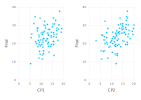

In [8]:
# Traçage des variables explicatives
fig1 = plot(data, x=:CP1, y=:Final, Geom.point)
fig2 = plot(data, x=:CP2, y=:Final, Geom.point)
hstack(fig1,fig2)

In [111]:
X₁ = collect(skipmissing(data[:,:CP1]))
X₂ = collect(skipmissing(data[:,:CP2]))
X₃ = ones(n)
X₃[data[:Session].=="A2017"]=0
Y = collect(skipmissing(data[:,:Final]));
n = size(data,1)

91

In [101]:
X = hcat(ones(n),X₁,X₂,X₃)
p = size(X,2)-1
β̂ = (X'*X)\X'*Y
Ŷ = X*β̂
e = Y-Ŷ

91-element Array{Float64,1}:
 -0.509176
 -9.57233 
 -0.787885
  0.854663
  0.844285
 -7.93956 
  4.87067 
 -6.95864 
  1.43216 
  6.82481 
 -3.74945 
  7.73556 
  2.56268 
  ⋮       
  1.46356 
 -0.365732
  5.89352 
  0.470993
  0.527912
 -6.98174 
 -0.137606
  1.23998 
  1.58037 
  5.80451 
 11.1143  
 -2.67085 

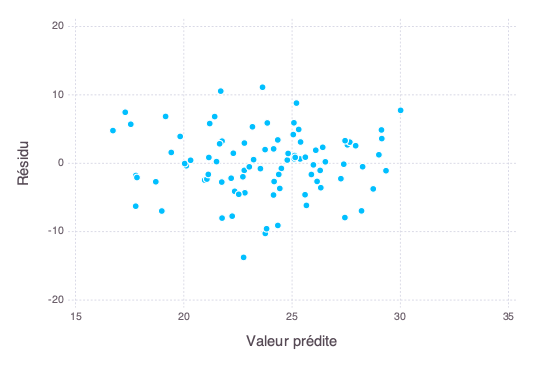

In [102]:
# Validation des hypothèses 1 et 2
plot(x=Ŷ, y=e, Geom.point, Guide.xlabel("Valeur prédite"), Guide.ylabel("Résidu"))

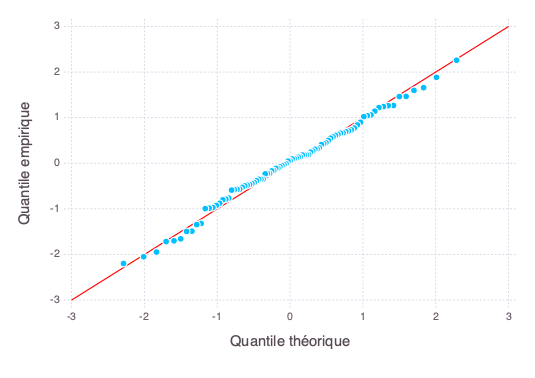

In [103]:
# Validation de l'hypothèse 4
empirical = layer(x=Normal(), y=e/std(e), Stat.qq, Geom.point, Theme(default_color="deepskyblue"))
theoretical = layer(x=[-3 3], y=[-3 3], Geom.line, Theme(default_color="red"))
plot(empirical,theoretical,Guide.xlabel("Quantile théorique"), Guide.ylabel("Quantile empirique"))

In [104]:
SST = sum( (Y-mean(Y)).^2)
SSE = sum( e.^2 )
SSR = SST - SSE

F₀ = (SSR/1) / (SSE/(n-1-1)) 

# On rejette H₀ au seuil de 5% si la valeur-p associé à F₀ est plus petite que 5%
valeurp = ccdf(FDist(1,55),F₀)
if valeurp<0.05
    println("Comme la valeur-p = $valeurp<0.05, on rejette H_0. La régression est donc significative.")
else
    println("Comme la valeur-p = $valeurp>0.05, on ne rejette pas H_0. La régression n'est donc pas significative.")
end

# Calcul du coefficient de détermination
R² = SSR/SST
println("Le coefficient de détermination est $R²")

Comme la valeur-p = 5.469843416187205e-8<0.05, on rejette H_0. La régression est donc significative.
Le coefficient de détermination est 0.3076754477942975


In [105]:
# Estimation de la variance de l'erreur
σ̂² = sum(e.^2)/(n-p-1)

22.546359684058924

In [106]:
# Intervalle de confiance sur les coefficients de régression
C = inv(X'*X)

diag(C)*quantile(TDist(n-p-1),.025)


4-element Array{Float64,1}:
 -0.477809  
 -0.00223495
 -0.00160766
 -0.0914071 

In [107]:
 IC = [β̂-sqrt.(σ̂²*diag(C))*quantile(TDist(n-p-1),.975) β̂-sqrt.(σ̂²*diag(C))*quantile(TDist(n-p-1),.025)]

4×2 Array{Float64,2}:
  9.07876     18.3334  
  0.00538692   0.638334
  0.345377     0.882199
 -4.70877     -0.66093 

In [109]:
x₀ = [1.0 13.0 15.0 1.0]
Ŷ₀ = x₀*β̂

IC = [Ŷ₀-sqrt.(σ̂²*(1+x₀/(X'*X)*x₀'))*quantile(TDist(n-p-1),.975) Ŷ₀-sqrt.(σ̂²*(1+x₀/(X'*X)*x₀'))*quantile(TDist(n-p-1),.025)]


1×2 Array{Float64,2}:
 14.8683  33.9562